nama  : Andhika Dwiky pratama
email : andhikadwikyp@gmail.com
kota  : Madiun

In [1]:
!wget --no-check-certificate \
  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
  -O /tmp/rockpaperscissors.zip

--2021-04-18 05:39:30--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M   926KB/s    in 5m 2s   

2021-04-18 05:44:33 (1.02 MB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]



In [2]:
import zipfile

# mengekstrak file rockpaperscissors.zip
unzip_dir = '/tmp/rockpaperscissors.zip'
unzip_file = zipfile.ZipFile(unzip_dir,'r')
unzip_file.extractall('/tmp')
unzip_file.close()

In [3]:
import os

# mendefinisikan direktori
main_dir = '/tmp/rockpaperscissors/rps-cv-images'

In [10]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# membuat sebuah objek ImageDataGenerator
training_datagen = ImageDataGenerator(rescale=1./255,
                                  rotation_range=30,
                                  horizontal_flip=True,
                                  shear_range=0.2,
                                  zoom_range=0.2,
                                  fill_mode='nearest',
                                  validation_split=0.4)

In [11]:
# objek ImageDataGenerator sebelumnya kita persiapkan untuk dilatih
generator_train = training_datagen.flow_from_directory(main_dir,
                                                       target_size=(150,150),
                                                       class_mode='categorical',
                                                       shuffle=True,
                                                       subset='training')

generator_val = training_datagen.flow_from_directory(main_dir,
                                                 target_size=(150,150),
                                                 class_mode='categorical',
                                                 shuffle=True,
                                                 subset='validation')

Found 1314 images belonging to 3 classes.
Found 874 images belonging to 3 classes.


In [13]:
import tensorflow as tf
from tensorflow import keras

# membuat sebuah fungsi callbacks
class customCallback(tf.keras.callbacks.Callback):
  def on_epoch_begin(self, epoch, logs={}):
    if(logs.get('accuracy') is not None and logs.get('accuracy') > 0.96):
      print('\nAkurasi sudah mencapai 96%')
      self.model_stop_training = True

custom_callback = customCallback()

In [14]:
# membuat sebuah arsitektur CNN
model = tf.keras.models.Sequential([
                                     tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
                                     tf.keras.layers.MaxPooling2D(2, 2),
                                     tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
                                     tf.keras.layers.MaxPooling2D(2, 2),
                                     tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
                                     tf.keras.layers.MaxPooling2D(2, 2),
                                     tf.keras.layers.Flatten(),
                                     tf.keras.layers.Dropout(0.5),
                                     tf.keras.layers.Dense(200, activation='relu'),
                                     tf.keras.layers.Dense(512, activation='relu'),
                                     tf.keras.layers.Dense(3, activation='softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
flatten (Flatten)            (None, 36992)             0

In [15]:
# menentukan loss function dan optimizer pada CNN
model.compile(loss='categorical_crossentropy',
              optimizer='Adam',
              metrics=['accuracy'])

In [16]:
# melatih model
model.fit(generator_train,
          steps_per_epoch=25,
          epochs=20,
          validation_data=generator_val,
          validation_steps=5,
          verbose=2,
          callbacks=[custom_callback])

Epoch 1/20
25/25 - 35s - loss: 1.0832 - accuracy: 0.3935 - val_loss: 0.9747 - val_accuracy: 0.5437
Epoch 2/20
25/25 - 35s - loss: 0.8593 - accuracy: 0.6087 - val_loss: 0.7167 - val_accuracy: 0.7312
Epoch 3/20
25/25 - 35s - loss: 0.5443 - accuracy: 0.7987 - val_loss: 0.6229 - val_accuracy: 0.7937
Epoch 4/20
25/25 - 35s - loss: 0.5173 - accuracy: 0.7937 - val_loss: 0.4864 - val_accuracy: 0.7688
Epoch 5/20
25/25 - 34s - loss: 0.4090 - accuracy: 0.8481 - val_loss: 0.3569 - val_accuracy: 0.8813
Epoch 6/20
25/25 - 35s - loss: 0.2989 - accuracy: 0.8938 - val_loss: 0.1880 - val_accuracy: 0.9375
Epoch 7/20
25/25 - 35s - loss: 0.2913 - accuracy: 0.8963 - val_loss: 0.1768 - val_accuracy: 0.9375
Epoch 8/20
25/25 - 34s - loss: 0.1950 - accuracy: 0.9299 - val_loss: 0.2634 - val_accuracy: 0.9062
Epoch 9/20
25/25 - 35s - loss: 0.1905 - accuracy: 0.9312 - val_loss: 0.1156 - val_accuracy: 0.9563
Epoch 10/20
25/25 - 34s - loss: 0.1823 - accuracy: 0.9351 - val_loss: 0.1666 - val_accuracy: 0.9563
Epoch 11/

Saving bmlw6acW9500qauw.png to bmlw6acW9500qauw.png
bmlw6acW9500qauw.png
Tangan ini berbentuk gunting


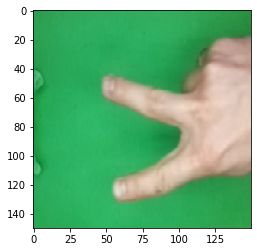

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
from keras.preprocessing import image

upload = files.upload()

for fn in upload.keys():
  path = fn
  photo = image.load_img(path, target_size=(150,150))
  imageplot = plt.imshow(photo)
  x = image.img_to_array(photo)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)

  print(fn)
  if classes[0][0] == 1:
    print('Tangan ini berbentuk kertas')
  elif classes[0][1] == 1:
    print('Tangan ini bebrbentuk batu')
  elif classes[0][2] == 1:
    print('Tangan ini berbentuk gunting')
  else:
    print('Bentuk tangan tidak diketahui')